In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
df = pd.read_csv("Boston.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


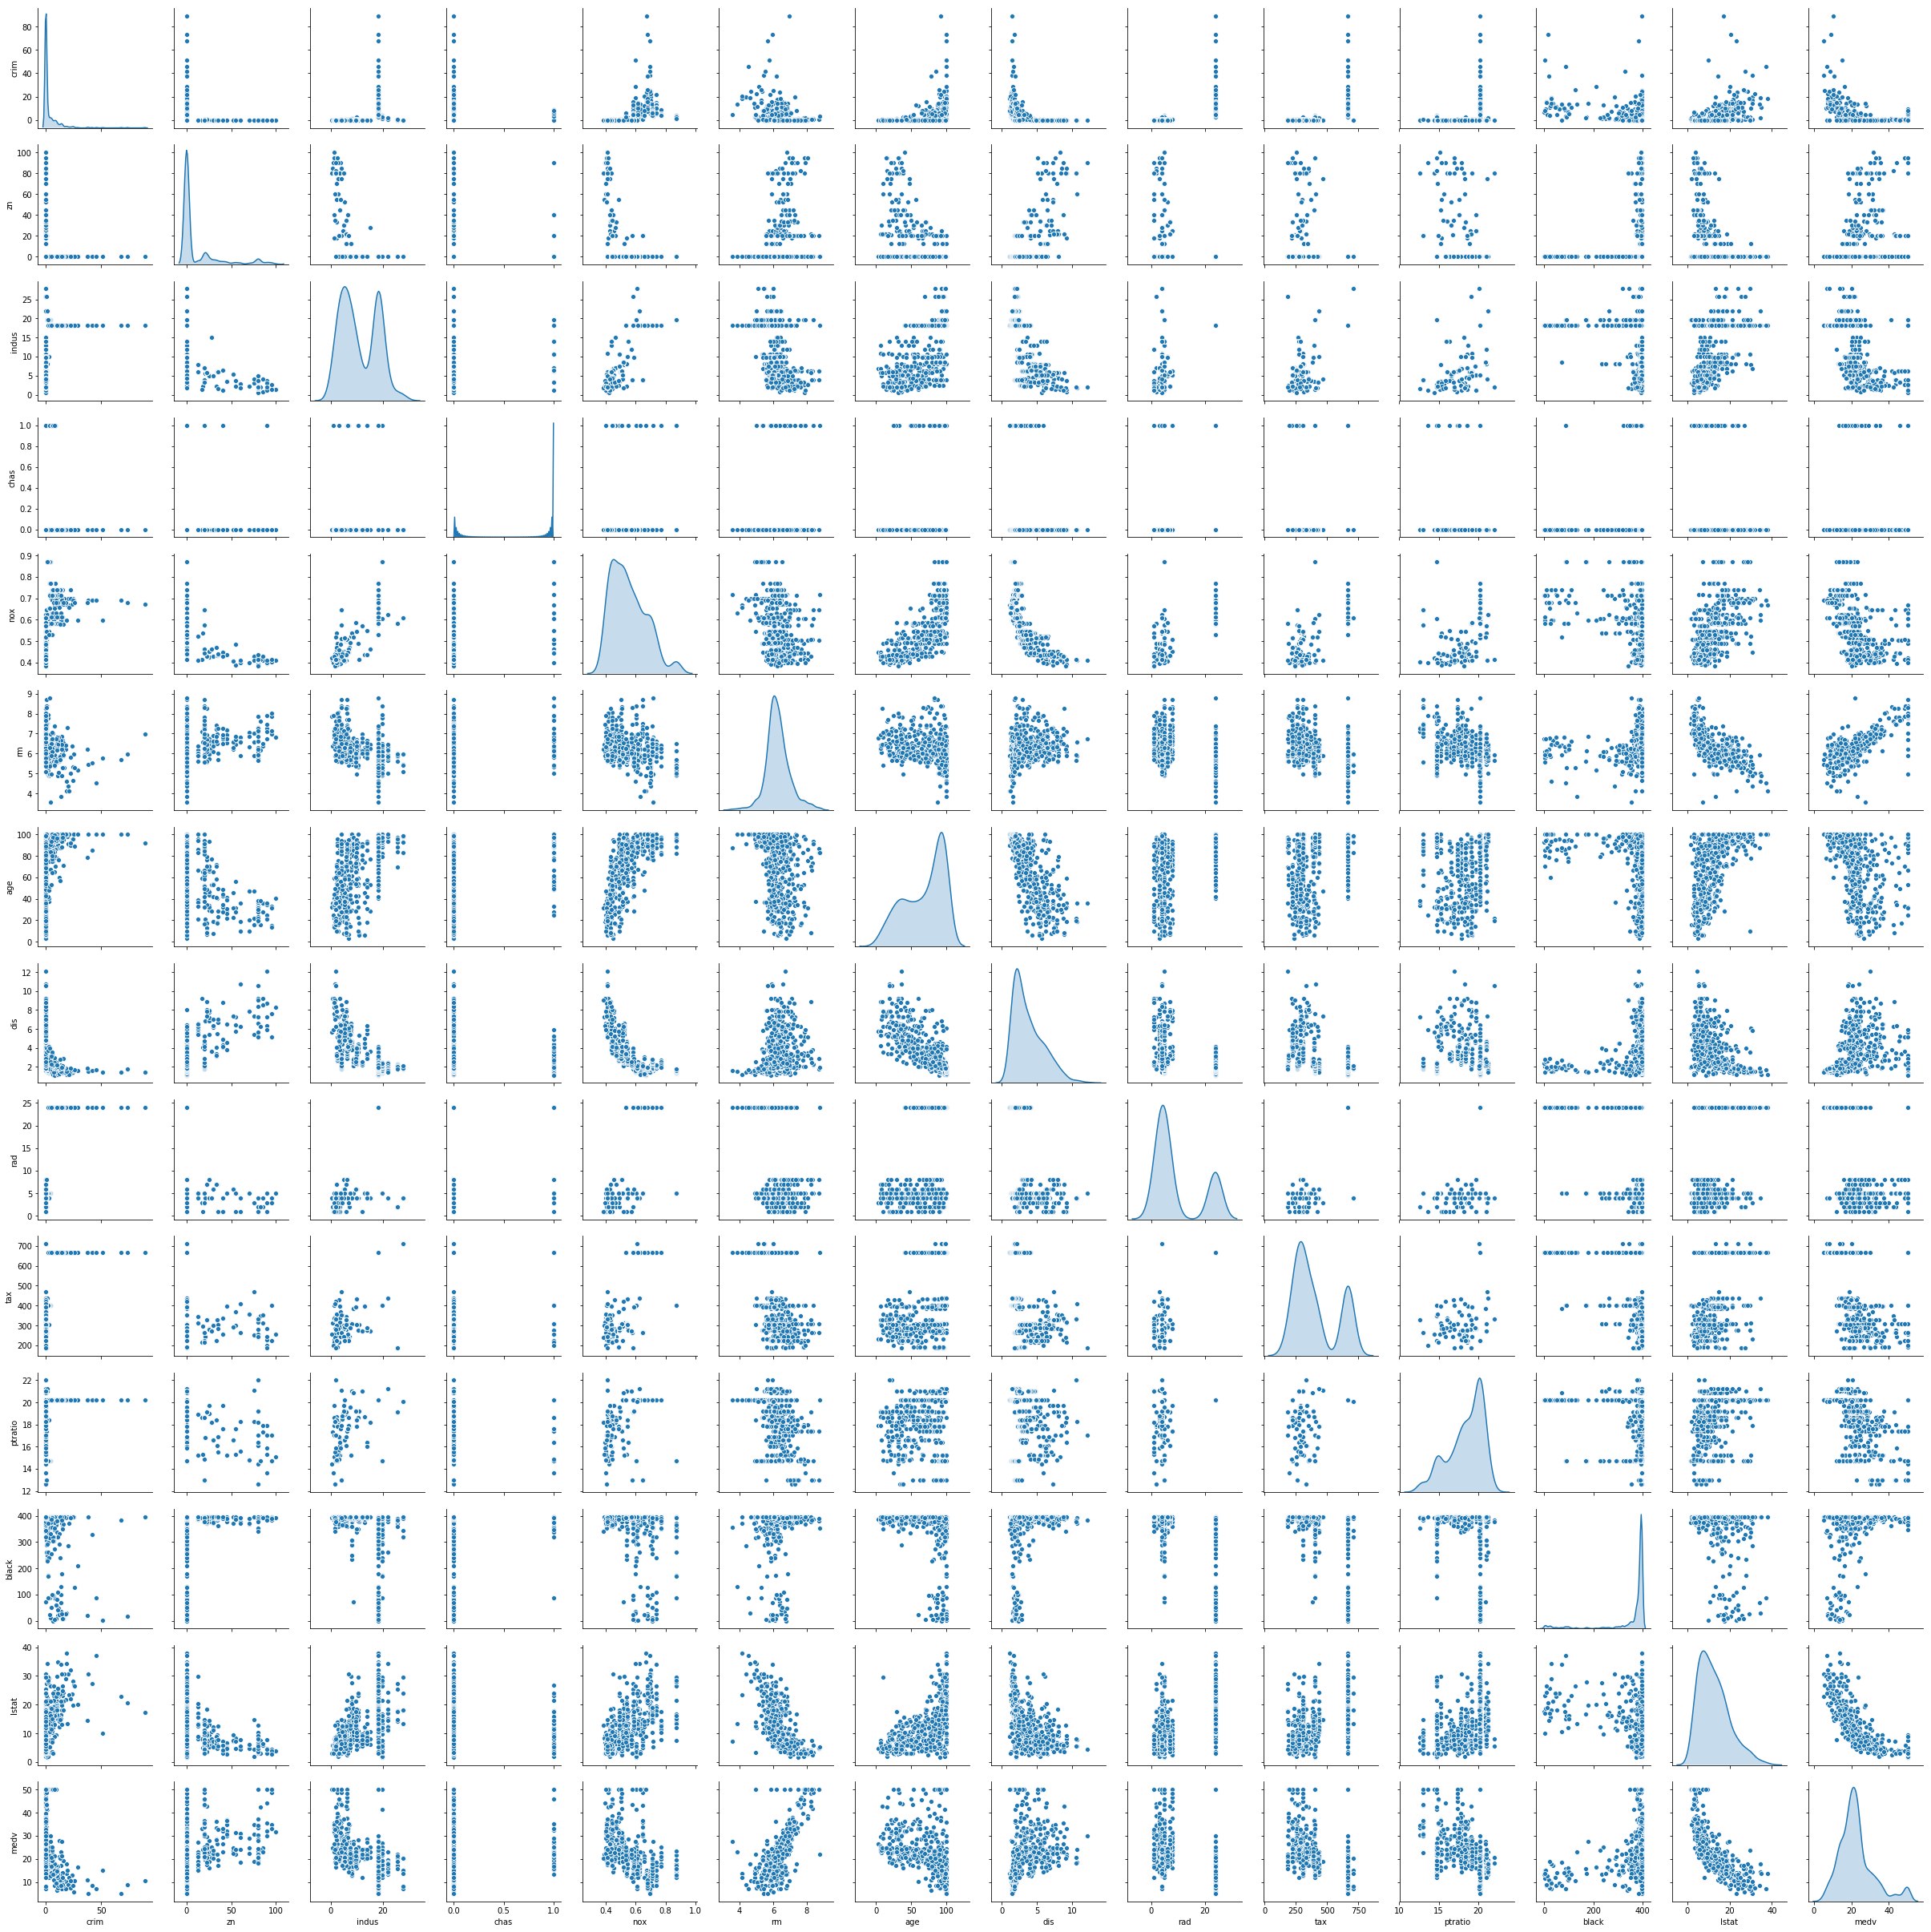

In [3]:
sns.pairplot(df, diag_kind='kde', height=2.4);

In [4]:
X = df.drop(["medv"], axis=1)
y = df.medv

##### Use sk-learn

In [5]:
reg = LinearRegression().fit(X, y)

/Users/shawlu/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [6]:
# theta
reg.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [7]:
# intercept
reg.intercept_ 

36.459488385089614

In [8]:
# r^2: coefficient of determination
reg.score(X, y)

0.7406426641094094

##### Get SE, p-values

In [9]:
model = sm.OLS(y, X).fit()
model.bse

crim       0.034421
zn         0.014403
indus      0.064440
chas       0.903913
nox        3.358732
rm         0.309109
age        0.013815
dis        0.195630
rad        0.066752
tax        0.003923
ptratio    0.109869
black      0.002697
lstat      0.050786
dtype: float64

In [10]:
model.pvalues

crim       7.197130e-03
zn         7.762640e-04
indus      9.497886e-01
chas       1.689461e-03
nox        3.935067e-01
rm         1.179476e-61
age        5.989795e-01
dis        1.016889e-06
rad        1.064354e-02
tax        1.698772e-02
ptratio    3.925055e-04
black      5.266943e-08
lstat      2.142519e-15
dtype: float64

##### Use Normal Equation

In [12]:
# include intercept
X_mat = np.concatenate([np.matrix(np.ones((X.shape[0], 1))), np.matrix(X.values)], axis=1)
X_mat.shape

(506, 14)

In [13]:
theta = np.linalg.inv(X_mat.T * X_mat) * X_mat.T * np.matrix(y).T

# note that first element is intercept
theta

matrix([[ 3.64594884e+01],
        [-1.08011358e-01],
        [ 4.64204584e-02],
        [ 2.05586264e-02],
        [ 2.68673382e+00],
        [-1.77666112e+01],
        [ 3.80986521e+00],
        [ 6.92224640e-04],
        [-1.47556685e+00],
        [ 3.06049479e-01],
        [-1.23345939e-02],
        [-9.52747232e-01],
        [ 9.31168327e-03],
        [-5.24758378e-01]])

In [14]:
rss = np.square(X_mat * theta - np.matrix(y).T).sum()

In [15]:
tss = np.square(np.matrix(y) - np.mean(y)).sum()

In [16]:
# r^2: coefficient of determination
(tss - rss) / tss

0.7406426641094094

##### Mean always passes through least square line

In [17]:
X_mean = np.mean(X_mat, axis=0)

In [18]:
X_mean * theta

matrix([[22.53280632]])

In [19]:
np.mean(y)

22.532806324110698

#### Centering data
* intercept becomes 0
* all other params do not change

In [20]:
X_c = X - np.mean(X, axis=0)
X_c = np.concatenate([np.matrix(np.ones((X.shape[0], 1))), np.matrix(X_c.values)], axis=1)

In [21]:
y_c = y - np.mean(y)

In [22]:
theta = np.linalg.inv(X_c.T * X_c) * X_c.T * np.matrix(y_c).T

# note that first element is intercept
theta

matrix([[-1.56541446e-14],
        [-1.08011358e-01],
        [ 4.64204584e-02],
        [ 2.05586264e-02],
        [ 2.68673382e+00],
        [-1.77666112e+01],
        [ 3.80986521e+00],
        [ 6.92224640e-04],
        [-1.47556685e+00],
        [ 3.06049479e-01],
        [-1.23345939e-02],
        [-9.52747232e-01],
        [ 9.31168327e-03],
        [-5.24758378e-01]])

#### Multiplying predictors
* All slopes are multipled by inverse

In [23]:
X_s = 2 * X_mat

In [24]:
theta = np.linalg.inv(X_s.T * X_s) * X_s.T * np.matrix(y).T

theta

matrix([[ 1.82297442e+01],
        [-5.40056789e-02],
        [ 2.32102292e-02],
        [ 1.02793132e-02],
        [ 1.34336691e+00],
        [-8.88330561e+00],
        [ 1.90493260e+00],
        [ 3.46112320e-04],
        [-7.37783423e-01],
        [ 1.53024739e-01],
        [-6.16729696e-03],
        [-4.76373616e-01],
        [ 4.65584164e-03],
        [-2.62379189e-01]])

In [25]:
reg.intercept_ / 2

18.229744192544807

In [26]:
reg.coef_ / 2

array([-5.40056789e-02,  2.32102292e-02,  1.02793132e-02,  1.34336691e+00,
       -8.88330561e+00,  1.90493260e+00,  3.46112320e-04, -7.37783423e-01,
        1.53024739e-01, -6.16729696e-03, -4.76373616e-01,  4.65584164e-03,
       -2.62379189e-01])